In [128]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import json
import re

In [22]:
headlines = pd.read_json("headlines_from_20241215_to_20250114.json")

In [23]:
SIA = SentimentIntensityAnalyzer()
headlines['polarity'] = [SIA.polarity_scores(title)['compound'] for title in headlines.title]

In [24]:
currencies = ['EURUSD=X', 'JPY=X', 'GBPUSD=X', 'AUDUSD=X', 'CAD=X', 'CNY=X', 'CHF=X']
start_date = dt.datetime(2024,12, 15)
end_date = dt.datetime(2025, 1, 14)
fx_df = yf.download(currencies, start_date, end_date, interval='1d')

[*********************100%***********************]  7 of 7 completed


In [25]:
close = fx_df.Close

In [26]:
close

Ticker,AUDUSD=X,CAD=X,CHF=X,CNY=X,EURUSD=X,GBPUSD=X,JPY=X
Date,,,,,,,
2024-12-16,0.636712,1.42259,0.891744,7.2751,1.051005,1.262738,153.453003
2024-12-17,0.637640,1.42347,0.894040,7.2824,1.051735,1.269036,154.085999
2024-12-18,0.634115,1.43097,0.892480,7.2846,1.049505,1.271084,153.572006
2024-12-19,0.620620,1.44610,0.901700,7.2854,1.035025,1.256771,154.673004
2024-12-20,0.623400,1.44031,0.898990,7.2954,1.036495,1.249797,157.643997
2024-12-23,0.625289,1.43613,0.893050,7.2954,1.043308,1.256992,156.533005
2024-12-24,0.624493,1.43742,0.898470,7.2970,1.040583,1.253447,157.164993
2024-12-25,0.623908,1.43620,0.900300,7.2946,1.040258,1.253604,157.106995
2024-12-26,0.624457,1.43536,0.899420,7.2972,1.039955,1.254375,157.132996


<Axes: xlabel='Date', ylabel='EURUSD=X'>

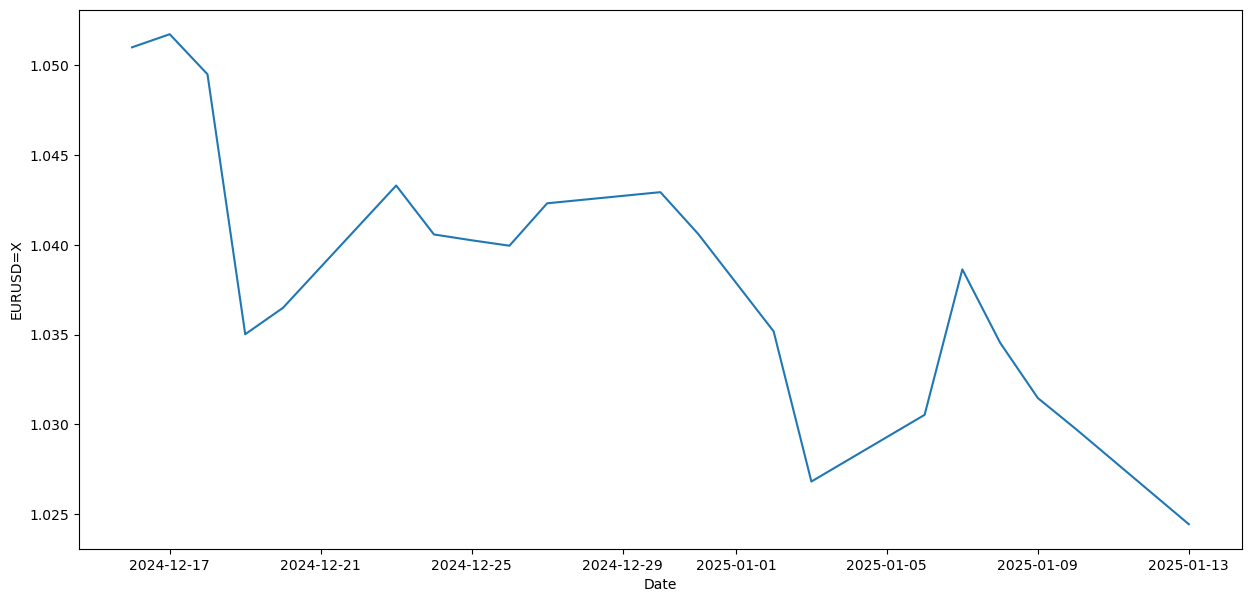

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(x = close.index, y= close['EURUSD=X'])

In [28]:
subheadlines = headlines[['publishedAt', 'polarity']]
subheadlines['Date'] = [d[:10] for d in subheadlines.publishedAt]

/var/folders/ys/h6pzdyyj77161gz2hb659s880000gn/T/ipykernel_90957/4272971241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subheadlines['Date'] = [d[:10] for d in subheadlines.publishedAt]


In [29]:
subheadlines.drop(columns=['publishedAt'], inplace=True)

/var/folders/ys/h6pzdyyj77161gz2hb659s880000gn/T/ipykernel_90957/934190605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subheadlines.drop(columns=['publishedAt'], inplace=True)


In [30]:
subheadlines

,polarity,Date
0,0.0000,2024-12-15
1,-0.3818,2024-12-15
2,0.2500,2024-12-15
3,0.0000,2024-12-15
4,0.0000,2024-12-15
...,...,...
2636,-0.4767,2025-01-14
2637,0.4019,2025-01-14
2638,0.5106,2025-01-14
2639,0.0000,2025-01-14


In [31]:
subheadlines.loc[:, 'Date'] = pd.to_datetime(subheadlines['Date'])
subheadlines.loc[:, 'polarity']= pd.to_numeric(subheadlines['polarity'])
subheadlines = subheadlines.sort_values(by='Date')

#calculate average polarity
average_polarity = subheadlines.groupby('Date')['polarity'].mean()
average_polarity_df = average_polarity.reset_index(name='Average Polarity')
average_polarity_df

,Date,Average Polarity
0,2024-12-15,0.046416
1,2024-12-16,0.019217
2,2024-12-17,0.081533
3,2024-12-18,0.058121
4,2024-12-19,0.087260
5,2024-12-20,0.117994
6,2024-12-21,0.076825
7,2024-12-22,0.110072
8,2024-12-23,0.109804
9,2024-12-24,0.107476


<Axes: xlabel='Date', ylabel='Average Polarity'>

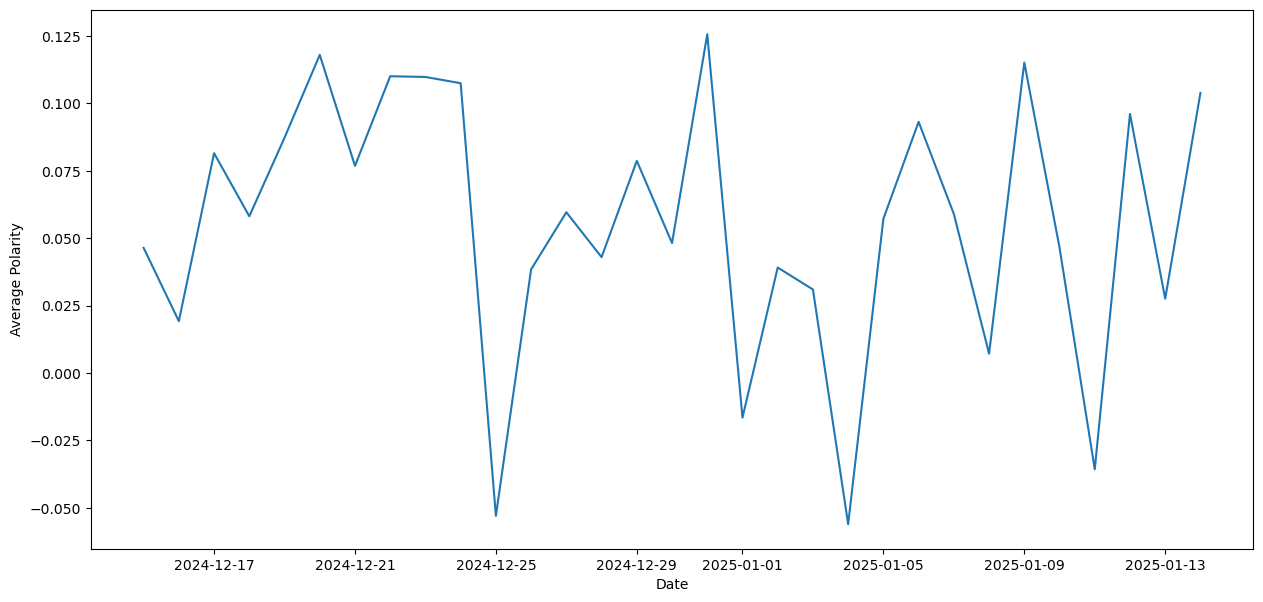

In [32]:
average_polarity_df = average_polarity_df.sort_values(by='Date')
average_polarity_df.set_index('Date', inplace=True)
plt.figure(figsize=(15,7))
sns.lineplot(x = average_polarity_df.index, y= average_polarity_df['Average Polarity'])

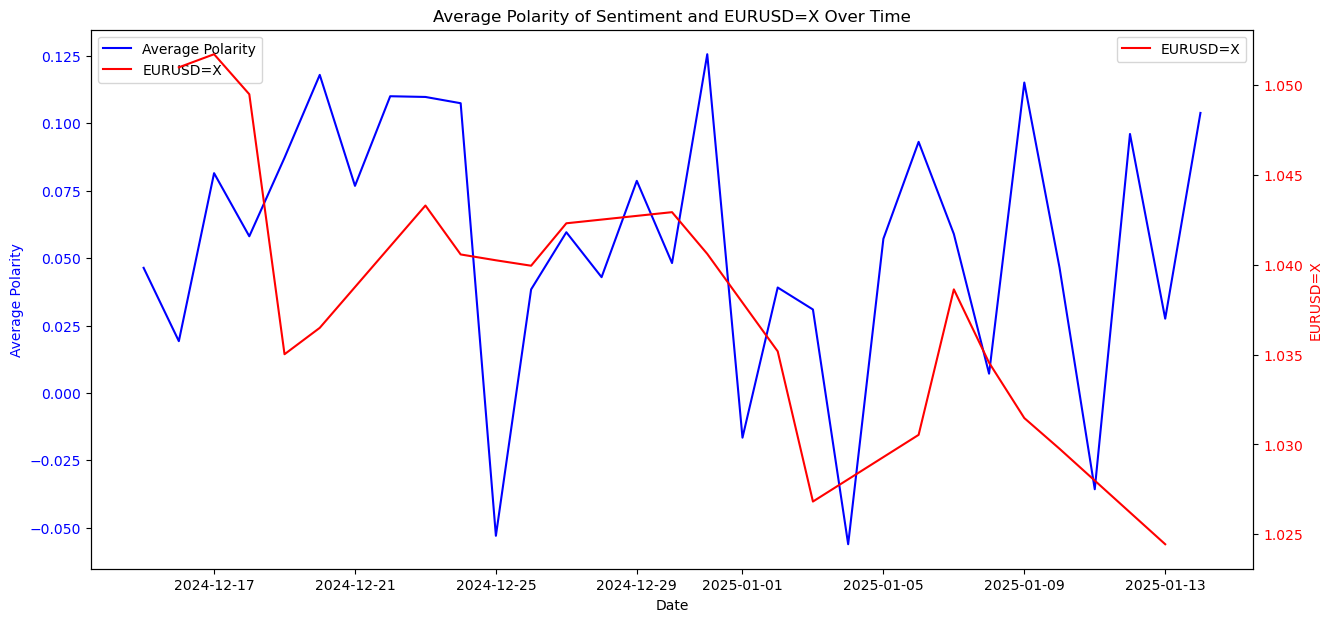

In [33]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the first dataset on the primary y-axis (left)
sns.lineplot(x=average_polarity_df.index, y=average_polarity_df['Average Polarity'], ax=ax1, label='Average Polarity', color='blue')
ax1.set_ylabel('Average Polarity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

# Create the secondary y-axis (right) and plot the second dataset
ax2 = ax1.twinx()
sns.lineplot(x=close.index, y=close['EURUSD=X'], ax=ax2, label='EURUSD=X', color='red')
ax2.set_ylabel('EURUSD=X', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Average Polarity of Sentiment and EURUSD=X Over Time')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Show the plot
plt.show()



In [137]:
client = boto3.client('bedrock-agent-runtime', region_name='us-east-1')

# Flow details
flow_id = ""
flow_alias_identifier = "
flow_arn = ""

# Function to invoke the flow
def invoke_flow(input_text):
    try:
        response = client.invoke_flow(
            flowIdentifier=flow_arn,
            flowAliasIdentifier=flow_alias_identifier,  
            inputs=[
                {
                    "content": {"document": input_text},
                    "nodeName": "FlowInputNode",
                    "nodeOutputName": "document"
                }
            ])
        
        result = {}

        for event in response.get("responseStream"):
            result.update(event)
        
        if result['flowCompletionEvent']['completionReason'] == 'SUCCESS':
            return result['flowOutputEvent']['content']['document']
            
            #print("Flow invocation was successful! The output of the &pf; is as follows:\n")
            #print(result['flowOutputEvent']['content']['document'])
        
        else:
            print("The &pf; invocation completed because of the following reason:", result['flowCompletionEvent']['completionReason'])
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")

def correct_relevance_key_in_string(json_string):
    # Replace "True" and "False" with "true" and "false" respectively
    corrected_string = json_string.replace('"relevance": True', '"relevance": true')
    corrected_string = corrected_string.replace('"relevance": False', '"relevance": false')
    #corrected_string = corrected_string.replace('"date"', ',"date"')
    return corrected_string

def fix_missing_comma(json_string):
    pattern = r'(")\s*(")'
    corrected_string = re.sub(pattern, r'\1, \2', json_string)
    return corrected_string

responses = []
for index, headline in headlines.iterrows():
    question = {"date": headline.publishedAt[:10],
                "headline": headline.title}
    r = invoke_flow(question)
    r = r.strip("[").strip("]")
    r = correct_relevance_key_in_string(r)
    r = r.replace("\n", "")
    responses.append(r)

In [145]:
cleaned_responses = []
errors = []

for rsp in responses:
    #SPLIT THE STRING
    rsp_list = rsp.split("},")

    #GO THROUGH EACH ELEMENT
    for rsp_ele in rsp_list:
        json_str = rsp_ele

        #REPLACE THE } DURING THE SPLIT
        if json_str != "" and json_str[-1] != "}":
            json_str = json_str + "}"

        #SOMETIMES LLM FORGETS TO ADD COMMA BETWEEN KEY:VALUE PAIRS
        json_str = fix_missing_comma(json_str)

        #TRY REMOVING } IF STR HAPPENS TO HAVE TWO OF THEM
        try:
            cleaned_responses.append(json.loads(json_str))
        except:
            #TRY ONE MORE TIME; KEEP TRACK OF ERRORS FOR FIXING
            try:
                cleaned_responses.append(json.loads(json_str[:-1]))
            except:
                errors.append(json_str)

In [146]:
len(errors)

110

In [147]:
len(cleaned_responses)

4264

In [164]:
cleaned_responses_df = pd.DataFrame(cleaned_responses)
cleaned_responses_df

,headline,date,relevance,currency,sentiment
0,Brazil Potash Schedules Investor Call,2024-12-15,True,BRL,Neutral
1,Asian Stocks Set to Fall Ahead of China Data D...,2024-12-15,True,YEN,Negative
2,Asian Stocks Set to Fall Ahead of China Data D...,2024-12-15,True,DOLLAR,Negative
3,Asian Stocks Set to Fall Ahead of China Data D...,2024-12-15,True,EURO,Negative
4,US agencies should use advanced technology to...,2024-12-15,False,Unknown,Negative
...,...,...,...,...,...
4259,BlackRock details 3 developments that could fl...,2025-01-14,True,TRY,Negative
4260,BlackRock details 3 developments that could fl...,2025-01-14,True,RUB,Negative
4261,BlackRock details 3 developments that could fl...,2025-01-14,True,HKD,Negative
4262,BlackRock details 3 developments that could fl...,2025-01-14,True,MXN,Negative


In [165]:
cleaned_responses_df.currency.unique()

array(['BRL', 'YEN', 'DOLLAR', 'EURO', 'Unknown', 'EUR', 'IRR', 'USD',
       'GBP', 'JPY', 'CAD', 'SAR', 'DOGE', 'MAD', 'Afghanistan Afghani',
       'AUD', 'CHF', 'CNY', 'CNH', 'INR', 'ZAR', 'PESO', 'BTC',
       'ARGENTINE PESO', 'US DOLLAR', 'KRW', 'PLN', 'BDT', 'VEF', 'SEK',
       'NOK', 'RUB', 'ARS', 'AUSTRALIAN DOLLAR', 'CLP', 'ILS', 'MXN',
       'Zambia', 'HKD', 'SGD', 'TRY', 'THB', 'IDR', 'MYR', 'BGN', 'RON',
       'HUF', 'CZK', 'PKR', 'AMD', 'EGP', 'JOD', 'IQD', 'XOF', 'XAF',
       'XAG', 'XAU', 'XPD', 'XPT', 'BHD', 'OMM', 'MVR', 'MZN', 'MWK',
       'CAE', 'RMB', 'PANAMA BANCO', 'PANAMA BALBOA', 'US DOLLAR INDEX',
       'DKK', 'AZN', 'BGB', 'BWB', 'EMERGING MARKETS', 'Bitcoin', 'LTC',
       'NZD', 'MOLDovan Leu', 'Russian Ruble', 'Euro', 'US Dollar',
       'West African CFA Franc (XOF)', 'Euro (EUR)', 'US Dollar (USD)',
       'West African CFA Franc (XOF) against Euro (EUR)',
       'West African CFA Franc (XOF) against US Dollar (USD)', 'UAH',
       'TWD', 'ISK', '

In [166]:
cleaned_responses_df['currency'] = cleaned_responses_df['currency'].replace(
    ["DOLLAR", "US Dollar (USD)", "US Dollar", "US DOLLAR INDEX", 'USD (Index)'], "USD"
)

In [167]:
cleaned_responses_df['currency'] = cleaned_responses_df['currency'].replace(
    ["EURO", "Euro"], "EUR"
)

In [168]:
EURUSD_df = cleaned_responses_df.loc[cleaned_responses_df['currency'].isin(["USD", "EUR"])]

In [169]:
EURUSD_df.sentiment.value_counts()

sentiment
Negative    450
Neutral     383
Positive    163
Unknown       1
Name: count, dtype: int64

In [163]:
EURUSD_df

,headline,Date,relevance,currency,sentiment
2,Asian Stocks Set to Fall Ahead of China Data D...,2024-12-15,True,2024-12-15,Negative
3,Asian Stocks Set to Fall Ahead of China Data D...,2024-12-15,True,2024-12-15,Negative
5,Germany Is Unraveling Just When Europe Needs I...,2024-12-15,True,2024-12-15,Negative
13,Iran Scrambles to Tackle Fuel Shortages Amid a...,2024-12-15,True,2024-12-15,Neutral
14,Iran Scrambles to Tackle Fuel Shortages Amid a...,2024-12-15,True,2024-12-15,Neutral
...,...,...,...,...,...
4241,Ukraine says it carried out its 'largest attac...,2025-01-14,True,2025-01-14,Negative
4242,Ukraine says it carried out its 'largest attac...,2025-01-14,True,2025-01-14,Negative
4245,BlackRock details 3 developments that could fl...,2025-01-14,True,2025-01-14,Negative
4246,BlackRock details 3 developments that could fl...,2025-01-14,True,2025-01-14,Negative


In [170]:
EURUSD_df = EURUSD_df.rename(columns={"date": "Date"})
EURUSD_df.Date.unique()

array(['2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18',
       '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22',
       '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
       '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
       '2024-12-31', '2025-01-01', '2025-01-02', '2025-01-03',
       '2025-01-04', '2025-01-05', '2025-01-06', '2025-01-07',
       '2025-01-08', '2025-01-09', '2025-01-10', '2025-01-11',
       '2025-01-12', '2025-01-13', '01/13/2025', '2025-01-14'],
      dtype=object)

In [171]:
EURUSD_df['Date'] = EURUSD_df['Date'].replace(['01/13/2025'], "2025-01-13")

In [172]:
EURUSD_df.loc[:, 'Date'] = pd.to_datetime(EURUSD_df['Date'])
EURUSD_df = EURUSD_df.sort_values(by='Date')

In [173]:
EURUSD_df['polarity'] = [SIA.polarity_scores(headline)['compound'] for headline in EURUSD_df.headline]

In [175]:
#calculate average polarity
average_polarity = EURUSD_df.groupby('Date')['polarity'].mean()
EURUSD_df_average_polarity_df = average_polarity.reset_index(name='Average Polarity')
EURUSD_df_average_polarity_df = EURUSD_df_average_polarity_df.sort_values(by='Date')
EURUSD_df_average_polarity_df.set_index('Date', inplace=True)
#plt.figure(figsize=(15,7))
#sns.lineplot(x = EURUSD_df_average_polarity_df.index, y= EURUSD_df_average_polarity_df['Average Polarity'])

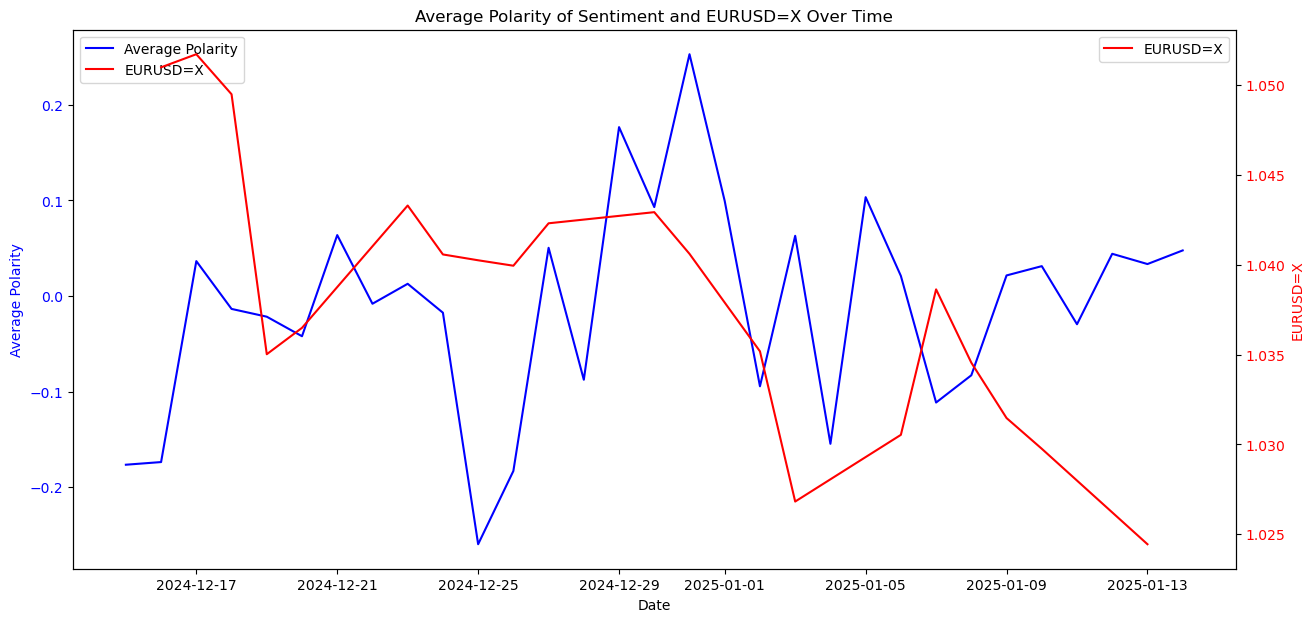

In [176]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the first dataset on the primary y-axis (left)
sns.lineplot(x=EURUSD_df_average_polarity_df.index, y=EURUSD_df_average_polarity_df['Average Polarity'], ax=ax1, label='Average Polarity', color='blue')
ax1.set_ylabel('Average Polarity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

# Create the secondary y-axis (right) and plot the second dataset
ax2 = ax1.twinx()
sns.lineplot(x=close.index, y=close['EURUSD=X'], ax=ax2, label='EURUSD=X', color='red')
ax2.set_ylabel('EURUSD=X', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Average Polarity of Sentiment and EURUSD=X Over Time')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Show the plot
plt.show()

In [179]:
EURUSD_df_relevant = EURUSD_df[EURUSD_df.relevance == True]

In [180]:
EURUSD_df_relevant

,headline,Date,relevance,currency,sentiment,polarity
2,Asian Stocks Set to Fall Ahead of China Data D...,2024-12-15 00:00:00,True,USD,Negative,-0.3818
77,The fall of Afghanistan's horse power is a les...,2024-12-15 00:00:00,True,EUR,Negative,0.0000
76,The fall of Afghanistan's horse power is a les...,2024-12-15 00:00:00,True,USD,Negative,0.0000
62,Rebels Vow to Ramp Up Fight Against Morocco Ov...,2024-12-15 00:00:00,True,USD,Negative,-0.5267
61,Rebels Vow to Ramp Up Fight Against Morocco Ov...,2024-12-15 00:00:00,True,EUR,Negative,-0.5267
...,...,...,...,...,...,...
4140,The race to succeed Larry Fink just got a litt...,2025-01-14 00:00:00,True,EUR,Neutral,0.8166
4156,Trump says he'll create an 'external revenue s...,2025-01-14 00:00:00,True,USD,Negative,0.5859
4161,"Carney, Freeland duel for top job as other con...",2025-01-14 00:00:00,True,USD,Neutral,0.2023
4162,"Carney, Freeland duel for top job as other con...",2025-01-14 00:00:00,True,EUR,Neutral,0.2023


In [183]:
average_polarity = EURUSD_df_relevant.groupby('Date')['polarity'].mean()
EURUSD_df_relevant_average_polarity_df = average_polarity.reset_index(name='Average Polarity')
EURUSD_df_relevant_average_polarity_df = EURUSD_df_relevant_average_polarity_df.sort_values(by='Date')
EURUSD_df_relevant_average_polarity_df.set_index('Date', inplace=True)

In [184]:
EURUSD_df_relevant_average_polarity_df

,Average Polarity
Date,
2024-12-15,-0.317929
2024-12-16,-0.206293
2024-12-17,0.031203
2024-12-18,-0.030388
2024-12-19,-0.073304
2024-12-20,0.075056
2024-12-21,0.060714
2024-12-22,-0.015400
2024-12-23,0.015750


In [194]:
df_shifted = EURUSD_df_relevant_average_polarity_df.shift(periods=-1)
df_shifted = df_shifted.drop(df_shifted.index[-1])

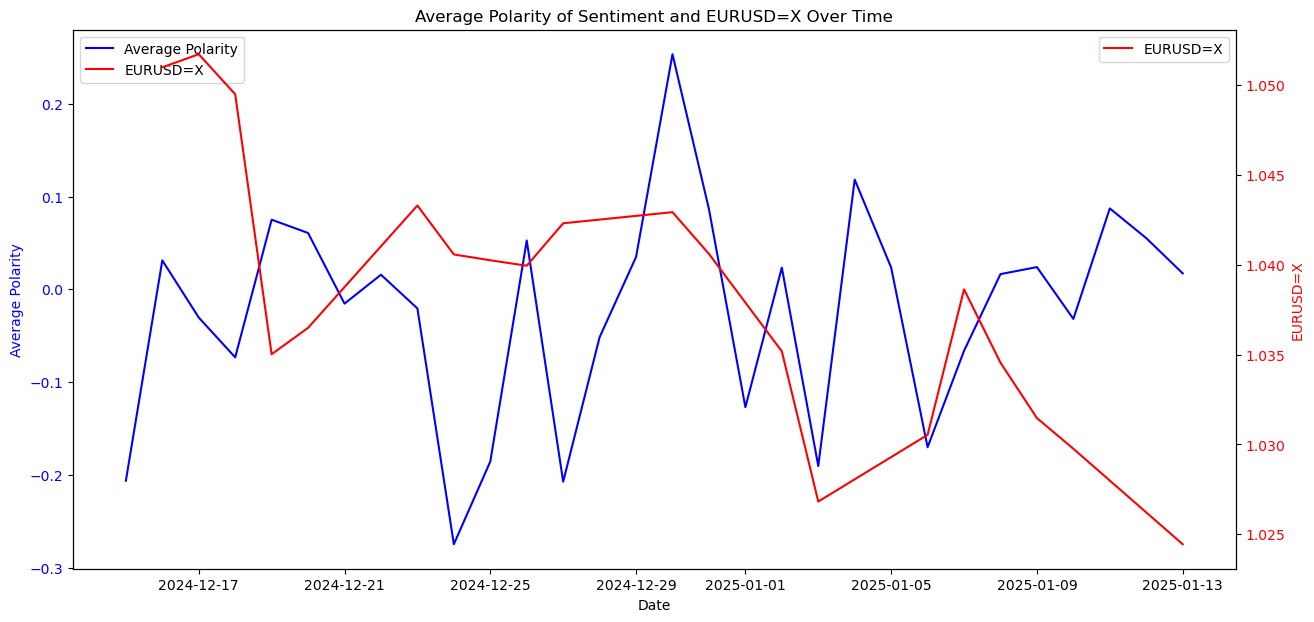

In [195]:

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the first dataset on the primary y-axis (left)
sns.lineplot(x=df_shifted.index, y=df_shifted['Average Polarity'], ax=ax1, label='Average Polarity', color='blue')
ax1.set_ylabel('Average Polarity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')

# Create the secondary y-axis (right) and plot the second dataset
ax2 = ax1.twinx()
sns.lineplot(x=close.index, y=close['EURUSD=X'], ax=ax2, label='EURUSD=X', color='red')
ax2.set_ylabel('EURUSD=X', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Average Polarity of Sentiment and EURUSD=X Over Time')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Show the plot
plt.show()